In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load Dataset

In [11]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Dtypes and Summary Statistics

In [12]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Assess Categorical Variable Counts

<AxesSubplot:xlabel='sex', ylabel='count'>

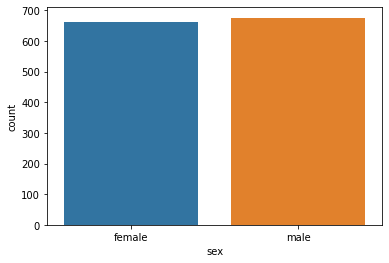

In [14]:
sns.countplot(x='sex', data=data)

<AxesSubplot:xlabel='smoker', ylabel='count'>

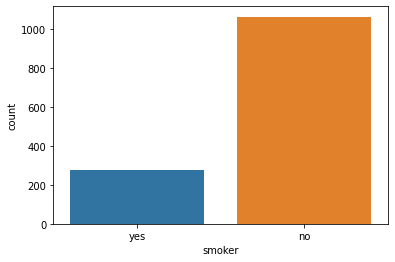

In [15]:
sns.countplot(x='smoker', data=data)

<AxesSubplot:xlabel='region', ylabel='count'>

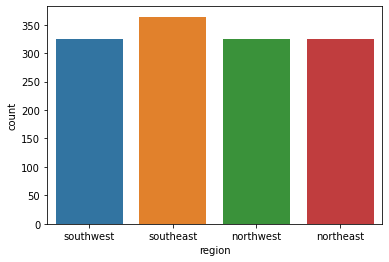

In [16]:
sns.countplot(x='region', data=data)

# Utilize One-Hot Encoding to Convert Categorical Variables

In [17]:
data = pd.get_dummies(data)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


# Split Features (X) and Target (Y)

In [22]:
X = data.drop(["charges"], axis=1)
Y = data["charges"]

# Assess Correlation Within Feature Variables

<AxesSubplot:>

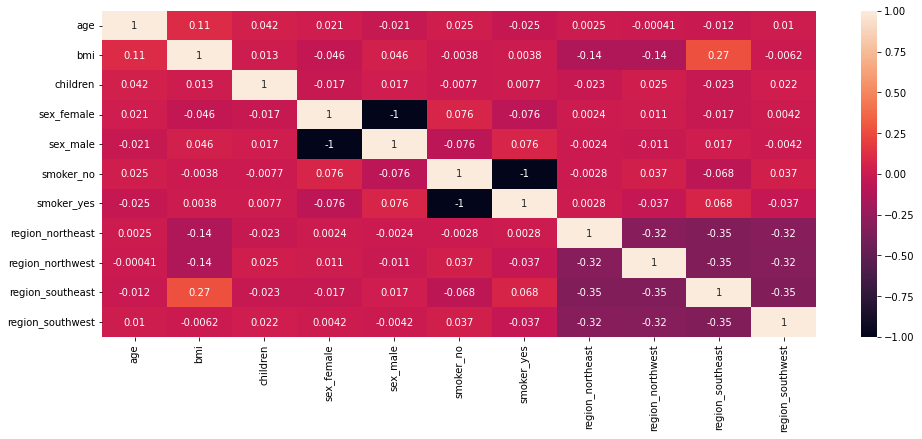

In [24]:
plt.figure(figsize=(16, 6))
sns.heatmap(X.corr(), annot=True)

# Assess Correlation of Feature Variables with Target Variable

<AxesSubplot:>

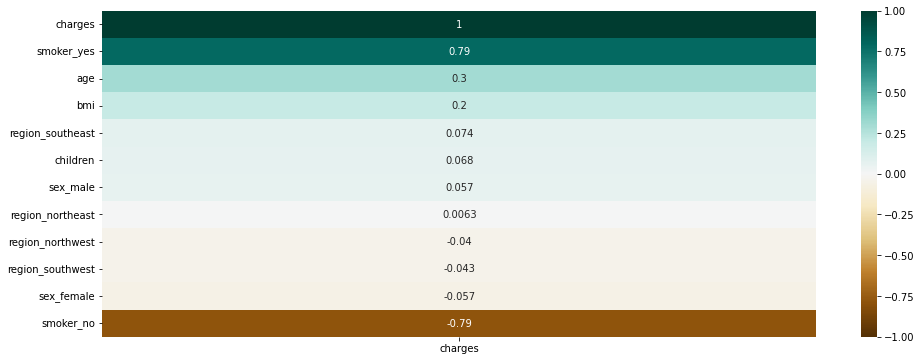

In [26]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr()[['charges']].sort_values(by='charges', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Convert Pandas Data to Numpy

In [32]:
X = X.to_numpy()
Y = Y.to_numpy()

# Split Into Training and Testing Sets

In [34]:
n = len(X)

train_perc = 0.75  # percentage of training set
train_ind = range(0, int(train_perc*n))  # indices of dataset for training
train_x = X[train_ind]
train_y = Y[train_ind]

test_ind = range(n-int(train_perc*n), n)  # indices of dataset for testing
test_x = X[test_ind]
test_y = Y[test_ind]